In [ ]:
# KAIST ME454 Week 3 Flying Tennis Racket

import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Tennis racket 26 points

# Coordinates of the points in the local coordinate system
ptxl = np.array([25, 55, 100, 160, 210, 275, 312, 370, 420, 495, 560, 635, 710, 710, 635, 560, 495, 420, 370, 312, 275, 210, 160, 100, 55, 25])
ptyl = np.array([200, 250, 280, 300, 300, 290, 270, 240, 210, 180, 175, 175, 175, 135, 135, 135, 130, 100, 70, 40, 20, 10, 10, 30, 60, 110])

# Coordinate of the COM in the local coordinate system
gxoffl = np.sum(ptxl*0.001)*0.01/(len(ptxl)*0.01)
gyoffl = np.sum(ptyl*0.001)*0.01/(len(ptyl)*0.01)
print(gxoffl, gyoffl)

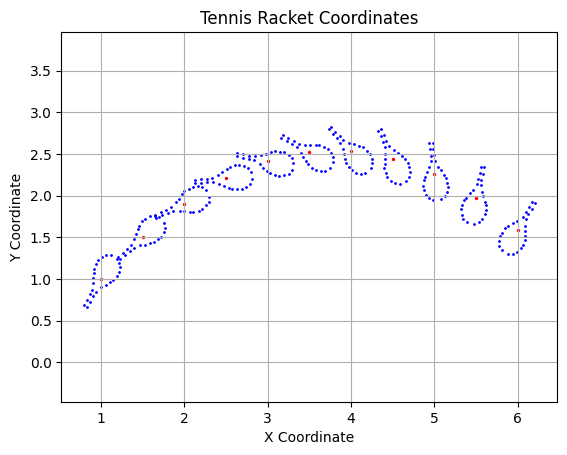

In [ ]:
# Initial conditions

# Rotation angle of the tennis racket coordinate system in the global coordinate system
theta0 = -120*math.pi/180  # rad

# Coordinate of the tennis racket COM in the global coordinate system
gxg0 = 1.0  # meter
gyg0 = 1.0  # meter

# Rotation velocity of the tennis racket coordinate system in the global coordinate system
omega0 = -180*math.pi/180   # rad/s

# Linear velocity of the tennis racket COM in the global coordinate system
vgxg0 = 5.0  # m/s
vgyg0 = 5.0  # m/s

oxg0 = gxg0 - (math.cos(theta0)*gxoffl - math.sin(theta0)*gyoffl)
oyg0 = gyg0 - (math.sin(theta0)*gxoffl + math.cos(theta0)*gyoffl)

ptxg = oxg0 + (math.cos(theta0)*ptxl*0.001 - math.sin(theta0)*ptyl*0.001)
ptyg = oyg0 + (math.sin(theta0)*ptxl*0.001 + math.cos(theta0)*ptyl*0.001)

# Create a scatter plot of the x and y coordinates
plt.figure()
plt.scatter(ptxg, ptyg, c='blue', marker='o', s=1)
plt.scatter(gxg0, gyg0, c='red', marker='o', s=2)

dt = 0.1

for _ in range(10):
    theta1 = theta0 + omega0 * dt
    omega1 = omega0

    gxg1 = gxg0 + vgxg0 * dt
    gyg1 = gyg0 + vgyg0 * dt

    vgxg1 = vgxg0
    vgyg1 = vgyg0 - 9.8 * dt

    oxg1 = gxg1 - (math.cos(theta1)*gxoffl - math.sin(theta1)*gyoffl)
    oyg1 = gyg1 - (math.sin(theta1)*gxoffl + math.cos(theta1)*gyoffl)

    ptxg = oxg1 + (math.cos(theta1)*ptxl*0.001 - math.sin(theta1)*ptyl*0.001)
    ptyg = oyg1 + (math.sin(theta1)*ptxl*0.001 + math.cos(theta1)*ptyl*0.001)

    plt.scatter(ptxg, ptyg, c='blue', marker='o', s=1)
    plt.scatter(gxg1, gyg1, c='red', marker='o', s=2)

    theta0 = theta1
    omega0 = omega1
    gxg0 = gxg1
    gyg0 = gyg1
    vgxg0 = vgxg1
    vgyg0 = vgyg1

# Set the aspect of the plot to be equal, so the tennis racket is not distorted
plt.axis('equal')

# Optionally set a title
plt.title('Tennis Racket Coordinates')

# Optionally add grid, labels and other customizations
plt.grid(True)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()